### Importing liberaries & Loading Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.float_format','{:.6f}'.format)

### Quick view in Data

In [ ]:
df = pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.900000,0,42.310000,2.572000,211.096358,8.106000
1,1,12-02-2010,1641957.440000,1,38.510000,2.548000,211.242170,8.106000
2,1,19-02-2010,1611968.170000,0,39.930000,2.514000,211.289143,8.106000
3,1,26-02-2010,1409727.590000,0,46.630000,2.561000,211.319643,8.106000
4,1,05-03-2010,1554806.680000,0,46.500000,2.625000,211.350143,8.106000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
df.size

51480

In [11]:
df.shape

(6435, 8)

In [12]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

### Missing values

In [13]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Distribution

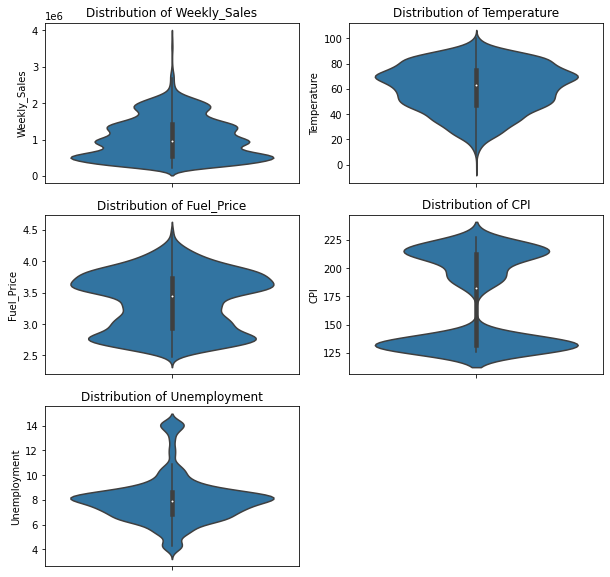

In [14]:
plt.figure(figsize=(10,10)) 
dist_cols=['Weekly_Sales', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']
for i in range(0,len(dist_cols)):
    plt.subplot(3,2,i+1)
    sns.violinplot(data=df, y=dist_cols[i])
    plt.title(f'Distribution of {dist_cols[i]}')

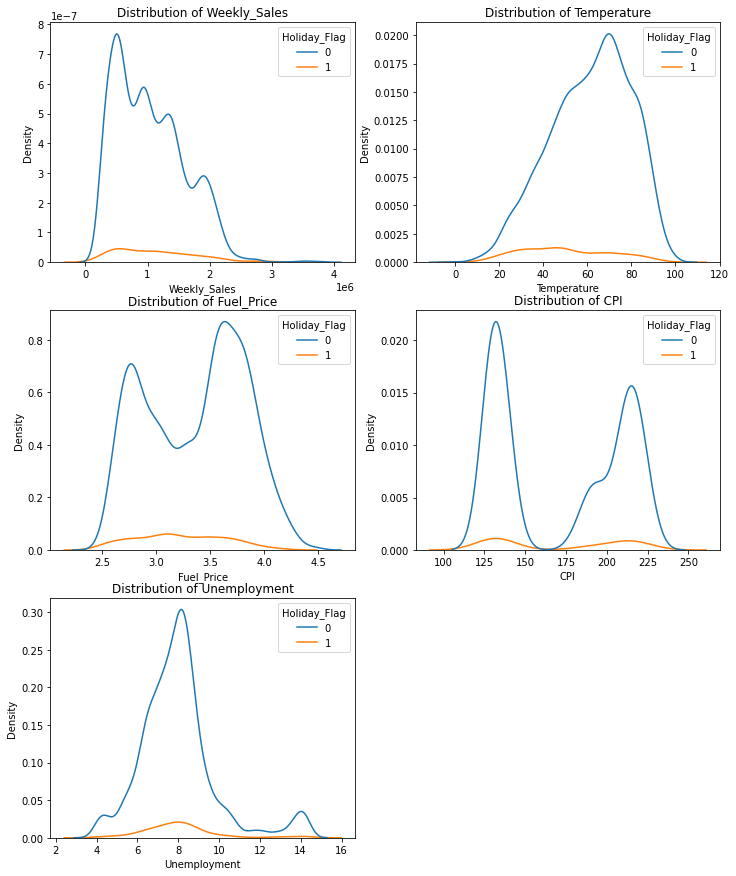

In [15]:
plt.figure(figsize=(12,15)) 
dist_cols=['Weekly_Sales', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']
for i in range(0,len(dist_cols)):
    figure= plt.subplot(3,2,i+1)
    sns.kdeplot(data=df, x=dist_cols[i], hue='Holiday_Flag')
    plt.title(f'Distribution of {dist_cols[i]}')

Pada kolom CPI dan Fuel Price berdistribusi bimodal. Oleh karena itu, lebih baik diubah menjadi "Low" dan "High"

### Outliers

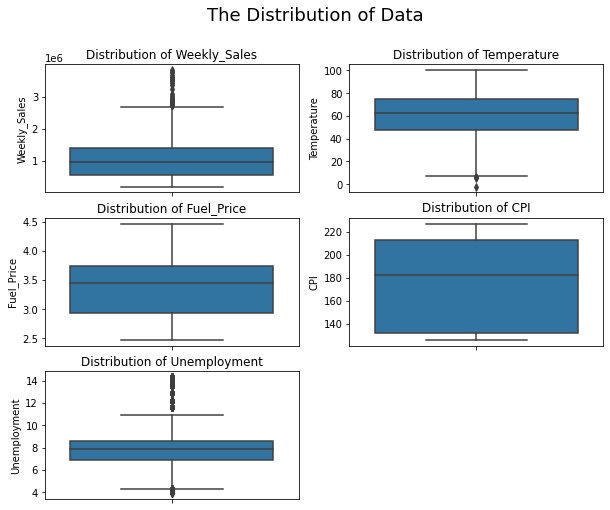

In [16]:
plt.figure(figsize=(10,8)) 
plt.suptitle('The Distribution of Data', fontsize=18)
dist_cols=['Weekly_Sales', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']
for i in range(0,len(dist_cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df, y=dist_cols[i])
    plt.title(f'Distribution of {dist_cols[i]}')

Karena tidak ada outliers yang janggal, maka dilanjutkan tanpa melakukan penghapusan outliers

### Correlation

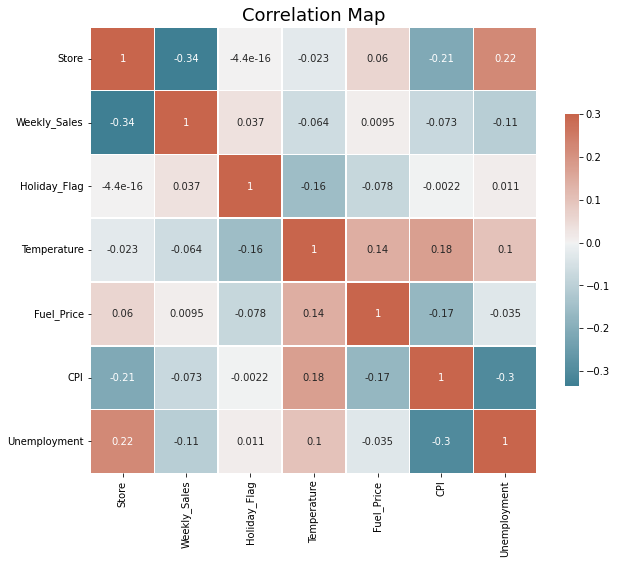

In [17]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10,10))
plt.title('Correlation Map', fontsize=18)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()



*   Antara kolom target “Weekly Sales” dengan kolom lainnya memiliki korelasi tertinggi pada kolom “Store” dan “Unemployment”
*   Antar variabel independen tidak terdapat multikolinearitas, sehingga semua variabel dapat digunakan dalam pemodelan. 


### Feature engineering

In [18]:
mean_CPI= df.CPI.mean()
mean_fuel_price=df.Fuel_Price.mean()

In [19]:
data=pd.DataFrame(df)

In [20]:
# Convert CPI and Fuel price columns to (Low and High)
df['CPI']= np.where(df['CPI'] <= mean_CPI,'Low','High')
df['Fuel_Price']= np.where(df['Fuel_Price'] <= mean_fuel_price,'Low','High')
# Convert the Temperature column to (Warm, Cool, Cold, Hot) 
df['Temperature']= np.where((df['Temperature'] <= 65) & (df['Temperature'] > 45) ,'Warm',
                            np.where((df['Temperature'] <= 45) & (df['Temperature'] > 25) ,'Cool'
                            ,
                            np.where((df['Temperature'] <= 25) & (df['Temperature'] >= 10) ,'Cold'
                            ,
                            'Hot')))


In [21]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.900000,0,Cool,Low,High,8.106000
1,1,12-02-2010,1641957.440000,1,Cool,Low,High,8.106000
2,1,19-02-2010,1611968.170000,0,Cool,Low,High,8.106000
3,1,26-02-2010,1409727.590000,0,Warm,Low,High,8.106000
4,1,05-03-2010,1554806.680000,0,Warm,Low,High,8.106000
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.950000,0,Warm,High,High,8.684000
6431,45,05-10-2012,733455.070000,0,Warm,High,High,8.667000
6432,45,12-10-2012,734464.360000,0,Warm,High,High,8.667000
6433,45,19-10-2012,718125.530000,0,Warm,High,High,8.667000


In [22]:
print(df.CPI.value_counts())
print(df.Fuel_Price.value_counts())
print(df.Temperature.value_counts())

High    3289
Low     3146
Name: CPI, dtype: int64
High    3464
Low     2971
Name: Fuel_Price, dtype: int64
Hot     2939
Warm    2137
Cool    1141
Cold     218
Name: Temperature, dtype: int64


### Feature Extraction

In [23]:
# Extract the day, month, year from the Date column:
df['Date'] = pd.to_datetime(df['Date'])
df['DayofYear'] = df['Date'].dt.dayofyear
df['Day'] = df['Date'].dt.weekday
df['DateofMonth'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayofYear,Day,DateofMonth,Month,Year
0,1,2010-05-02,1643690.900000,0,Cool,Low,High,8.106000,122,6,2,5,2010
1,1,2010-12-02,1641957.440000,1,Cool,Low,High,8.106000,336,3,2,12,2010
2,1,2010-02-19,1611968.170000,0,Cool,Low,High,8.106000,50,4,19,2,2010
3,1,2010-02-26,1409727.590000,0,Warm,Low,High,8.106000,57,4,26,2,2010
4,1,2010-05-03,1554806.680000,0,Warm,Low,High,8.106000,123,0,3,5,2010


In [24]:
# Converting the numerical values to categorical values in the day, month, year, holiday flag columns
# Date column
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df['Day'] = df['Day'].map(days)
months={
1:'January',
 2:'February',
 3:'March',
 4:'April',
 5:'May',
 6:'June',
7:'July',
 8:'August',
 9:'September',
10:'October',
11:'November',
 12:'December'}
df['Month']= df['Month'].map(months)
# Holiday_week column
holiday_week= {1:'Holiday week', 0:'Non-holiday week'}
df['Holiday_Flag']= df['Holiday_Flag'].map(holiday_week)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayofYear,Day,DateofMonth,Month,Year
0,1,2010-05-02,1643690.900000,Non-holiday week,Cool,Low,High,8.106000,122,Saturday,2,May,2010
1,1,2010-12-02,1641957.440000,Holiday week,Cool,Low,High,8.106000,336,Wednesday,2,December,2010
2,1,2010-02-19,1611968.170000,Non-holiday week,Cool,Low,High,8.106000,50,Thursday,19,February,2010
3,1,2010-02-26,1409727.590000,Non-holiday week,Warm,Low,High,8.106000,57,Thursday,26,February,2010
4,1,2010-05-03,1554806.680000,Non-holiday week,Warm,Low,High,8.106000,123,Sunday,3,May,2010


### EDA & Visualization

In [25]:
# Average yearly sales
YS = df.groupby('Year')['Weekly_Sales'].mean().reset_index().sort_values(by ='Weekly_Sales',ascending=False)
YS

,Year,Weekly_Sales
0,2010,1059669.500190
1,2011,1046239.319380
2,2012,1033660.392429


In [26]:
# Average monthly sales
MS = df.groupby('Month')['Weekly_Sales'].mean().reset_index().sort_values(by ='Weekly_Sales',ascending=False)
MS

,Month,Weekly_Sales
2,December,1210254.729636
9,November,1133751.446642
6,June,1064848.081056
3,February,1054597.339172
1,August,1044873.517611
8,May,1035378.790068
10,October,1030630.525504
7,March,1024974.832537
0,April,1024323.634317
5,July,1014211.858427


In [27]:
# Average daily sales
DS = df.groupby('Day')['Weekly_Sales'].mean().reset_index().sort_values(by ='Weekly_Sales',ascending=False)
DS

,Day,Weekly_Sales
3,Sunday,1088915.658929
1,Monday,1070388.777383
6,Wednesday,1059165.239200
2,Saturday,1053355.743679
0,Friday,1046276.679407
4,Thursday,1038485.492539
5,Tuesday,1030142.400667


In [28]:
# Average date (tanggal) sales
DT = df.groupby('DateofMonth')['Weekly_Sales'].mean().reset_index().sort_values(by ='Weekly_Sales',ascending=False)
DT

,DateofMonth,Weekly_Sales
11,12,1169597.235889
23,24,1161746.021156
22,23,1130370.818489
16,17,1110669.320622
24,25,1102654.061689
25,26,1097264.889600
5,6,1082924.593259
6,7,1082256.973467
15,16,1076483.233867
3,4,1069501.758044


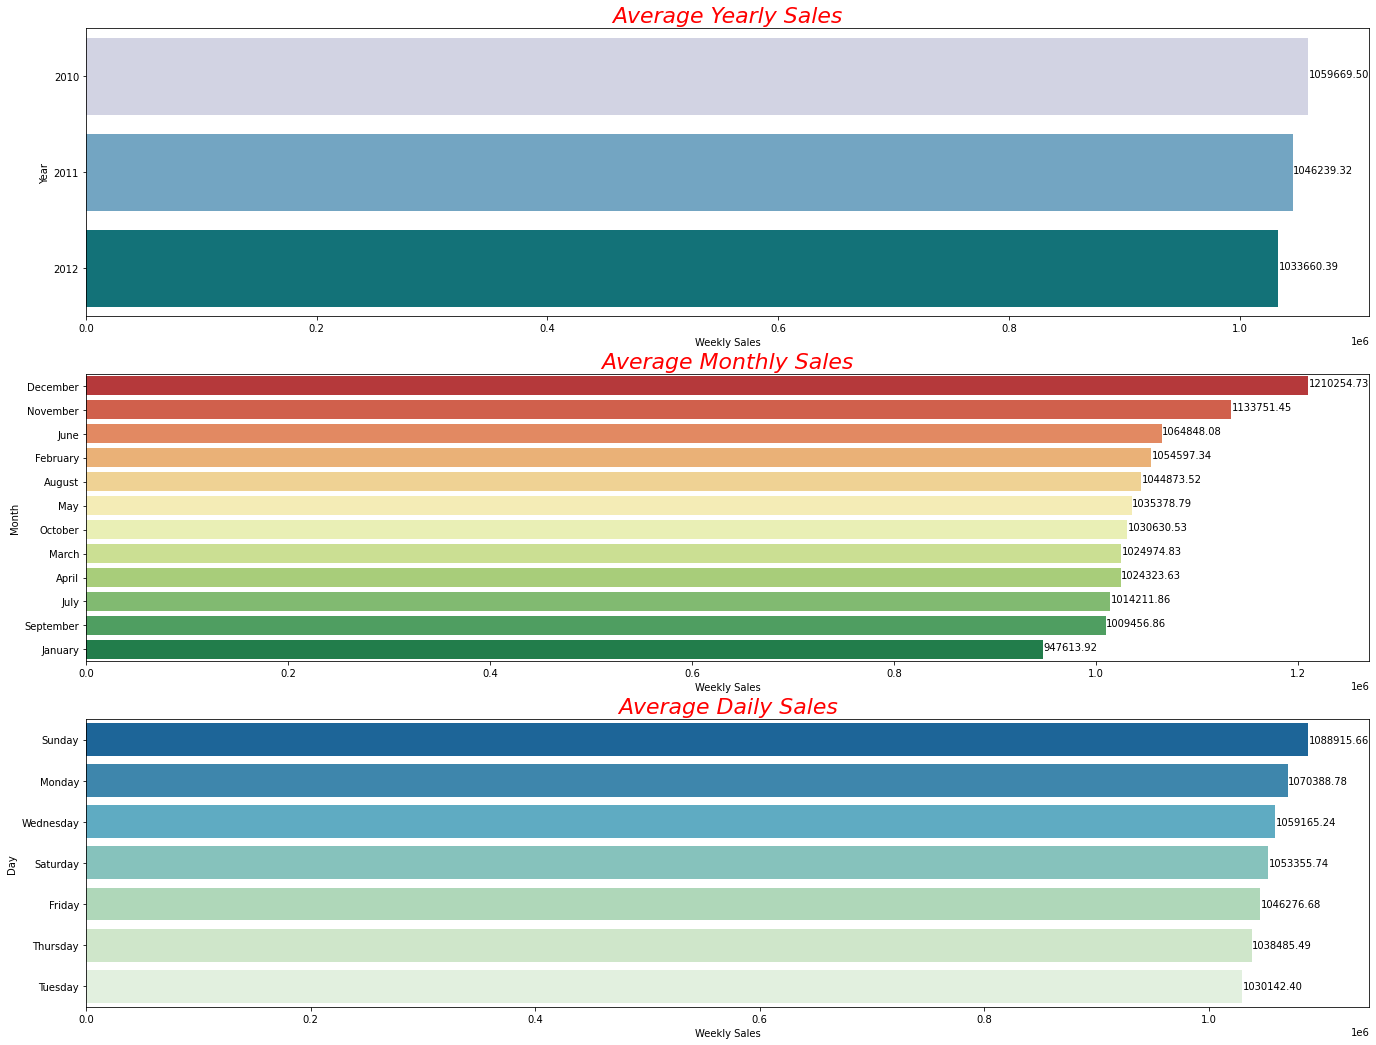

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize = (23,18))


sns.barplot(data=YS, x= 'Weekly_Sales', y='Year', orient='h', ax = ax1, palette='PuBuGn')
ax1.set_title('Average Yearly Sales',  color='red', fontsize= 22, fontstyle='italic')
ax1.set_xlabel('Weekly Sales')
for p in ax1.patches:
    ax1.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+ 0.5),
                 xytext=(0.5, 9), textcoords='offset points')

sns.barplot(data=MS, x= 'Weekly_Sales', y='Month', ax = ax2, palette ='RdYlGn')
ax2.set_title('Average Monthly Sales',  color='red', fontsize= 22, fontstyle='italic')
ax2.set_xlabel('Weekly Sales')

for p in ax2.patches:
    ax2.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+ 0.8),
                 xytext=(0.5, 9), textcoords='offset points')

sns.barplot(data=DS, x= 'Weekly_Sales', y='Day', ax = ax3, palette = 'GnBu_r')
ax3.set_title('Average Daily Sales',  color='red', fontsize= 22, fontstyle='italic')
ax3.set_xlabel('Weekly Sales')

for p in ax3.patches:
    ax3.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+ 0.7),
                 xytext=(0.5, 9), textcoords='offset points')

plt.show()

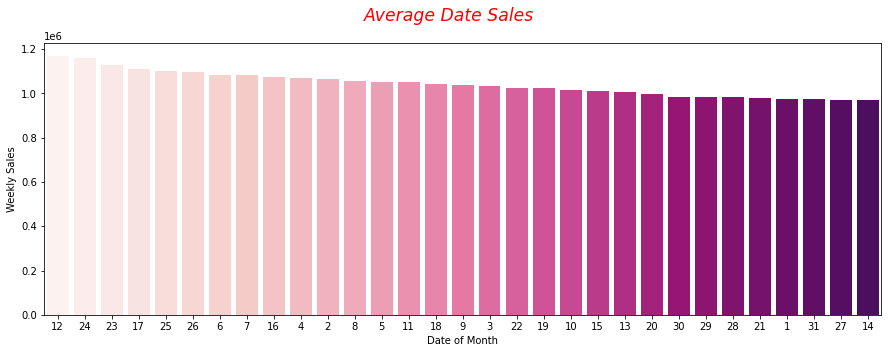

In [30]:
# Barplot The Average Date Sales over all years
fig = plt.figure(figsize = (15,5))  
fig.suptitle('Average Date Sales', fontsize = 'xx-large',  color='red', fontstyle='italic')

ax = sns.barplot(data = DT , x='DateofMonth', y='Weekly_Sales',order=DT.sort_values('Weekly_Sales',ascending = False).DateofMonth, palette = 'RdPu') 

ax.set_ylabel('Weekly Sales')
ax.set_xlabel('Date of Month')

plt.show() 

Dapat dilihat bahwa rata-rata penjualan berdasarkan tanggal yang paling tinggi terjadi pada tgl 12 dan terendah di tanggal 14. Akan di cek persebaran rata-rata penjualan berdasarkan tanggal.

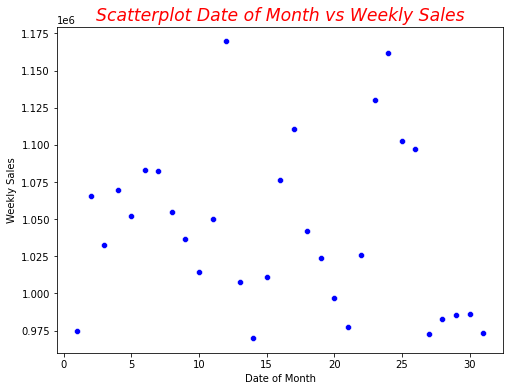

In [31]:
## Scatterplot Date of Month vs Weekly Sales
fig = plt.figure(figsize=(8, 6))  
ax = sns.scatterplot(data = DT, x = 'DateofMonth', y='Weekly_Sales', color = "blue")
title = plt.title('Scatterplot Date of Month vs Weekly Sales',fontsize = 'xx-large',  color='red', fontstyle='italic')
ax.set_ylabel("Weekly Sales")
ax.set_xlabel("Date of Month")
plt.show()

Dapat dilihat bahwa persebaran data Date of Month dengan Weekly Sales tidak berarturan, ini menandakan bahwa tanggal muda/tua tidak berpengaruh terhadapa penjualan Walmart

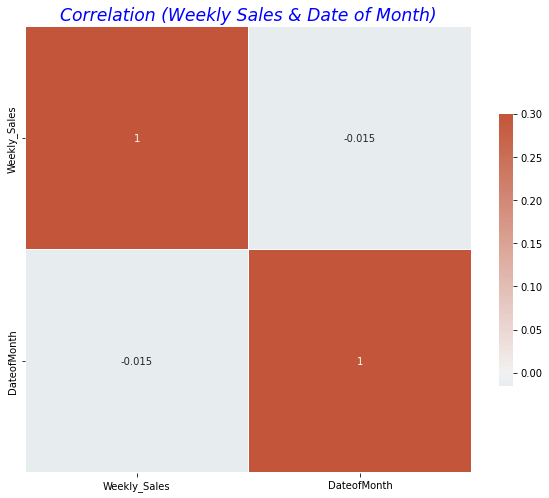

In [32]:
dtm= df[['Weekly_Sales','DateofMonth']]
corr = dtm.corr()
f, ax = plt.subplots(figsize=(10,10))
plt.title('Correlation (Weekly Sales & Date of Month)',fontsize = 'xx-large',  color='blue', fontstyle='italic')
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

Tanggal muda/tua tidak berpengaruh terhadap penjualan Walmart juga dibuktikan dengan korelasi antar kedua variabel yang sangat kecil.

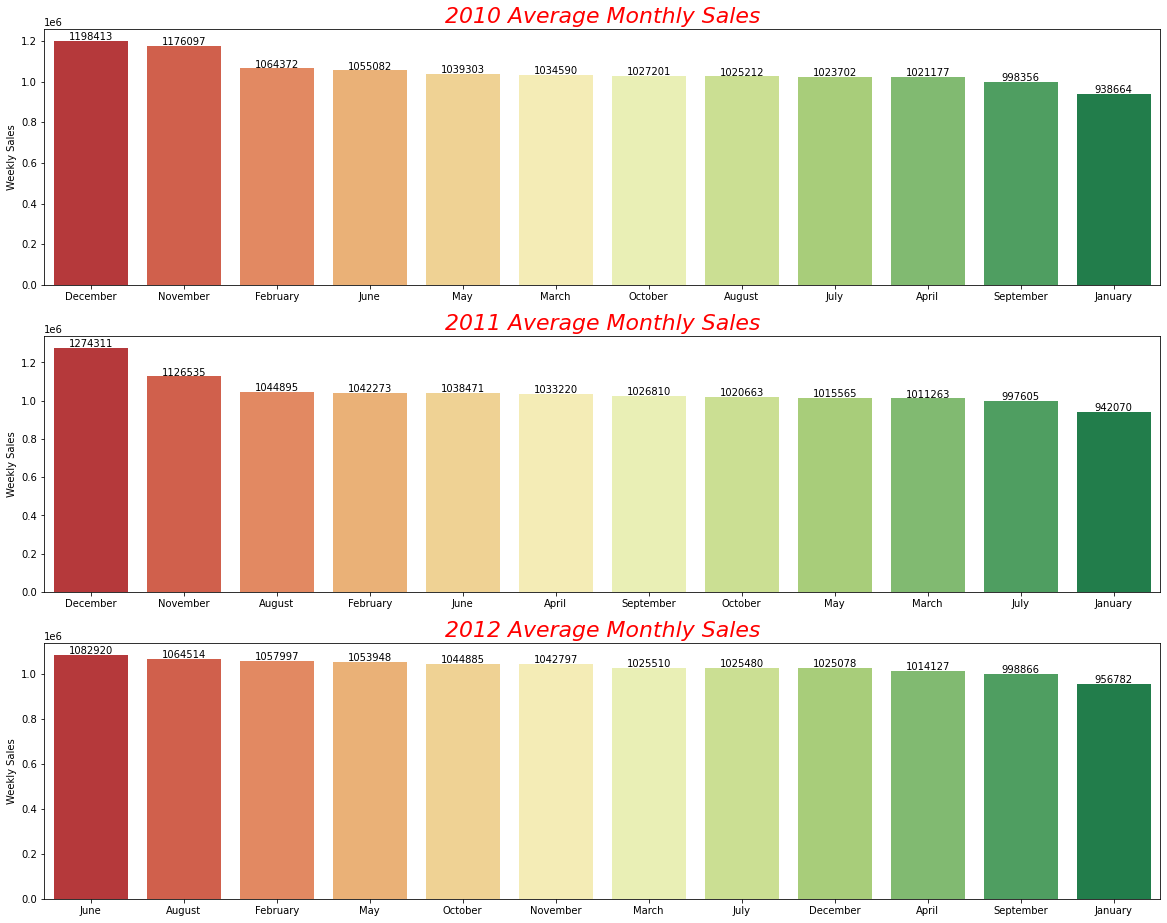

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize = (20,16))

sns.barplot(data=df[df['Year']==2010].groupby('Month')['Weekly_Sales'].mean().reset_index().sort_values(by ='Weekly_Sales',ascending=False), 
            x= 'Month', y='Weekly_Sales', ax = ax1, palette ='RdYlGn')
ax1.set_title('2010 Average Monthly Sales',  color='red', fontsize= 22, fontstyle='italic')
ax1.set_ylabel('Weekly Sales')
ax1.set_xlabel('')

for p in ax1.patches:
    ax1.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 4), textcoords='offset points')

sns.barplot(data=df[df['Year']==2011].groupby('Month')['Weekly_Sales'].mean().reset_index().sort_values(by ='Weekly_Sales',ascending=False), 
            x= 'Month', y='Weekly_Sales', ax = ax2, palette ='RdYlGn')
ax2.set_title('2011 Average Monthly Sales',  color='red', fontsize= 22, fontstyle='italic')
ax2.set_ylabel('Weekly Sales')
ax2.set_xlabel('')

for p in ax2.patches:
    ax2.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 4), textcoords='offset points')

sns.barplot(data=df[df['Year']==2012].groupby('Month')['Weekly_Sales'].mean().reset_index().sort_values(by ='Weekly_Sales',ascending=False), 
            x= 'Month', y='Weekly_Sales', ax = ax3, palette ='RdYlGn')
ax3.set_title('2012 Average Monthly Sales',  color='red', fontsize= 22, fontstyle='italic')
ax3.set_ylabel('Weekly Sales')
ax3.set_xlabel('')

for p in ax3.patches:
    ax3.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 4), textcoords='offset points')

plt.show()

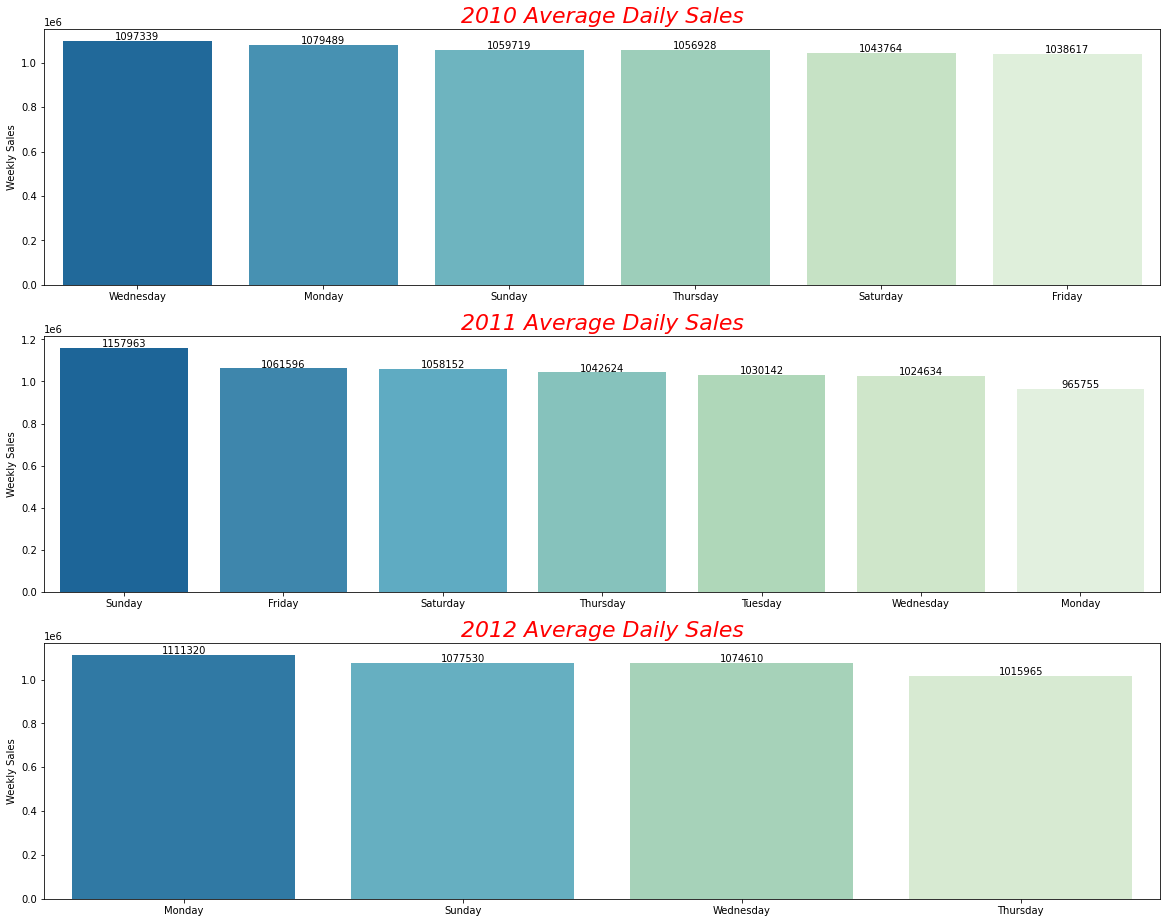

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize = (20,16))

sns.barplot(data=df[df['Year']==2010].groupby('Day')['Weekly_Sales'].mean().reset_index().sort_values(by ='Weekly_Sales',ascending=False), 
            x= 'Day', y='Weekly_Sales', ax = ax1, palette ='GnBu_r')
ax1.set_title('2010 Average Daily Sales',  color='red', fontsize= 22, fontstyle='italic')
ax1.set_ylabel('Weekly Sales')
ax1.set_xlabel('')

for p in ax1.patches:
    ax1.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 4), textcoords='offset points')

sns.barplot(data=df[df['Year']==2011].groupby('Day')['Weekly_Sales'].mean().reset_index().sort_values(by ='Weekly_Sales',ascending=False), 
            x= 'Day', y='Weekly_Sales', ax = ax2, palette ='GnBu_r')
ax2.set_title('2011 Average Daily Sales',  color='red', fontsize= 22, fontstyle='italic')
ax2.set_ylabel('Weekly Sales')
ax2.set_xlabel('')

for p in ax2.patches:
    ax2.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 4), textcoords='offset points')

sns.barplot(data=df[df['Year']==2012].groupby('Day')['Weekly_Sales'].mean().reset_index().sort_values(by ='Weekly_Sales',ascending=False), 
            x= 'Day', y='Weekly_Sales', ax = ax3, palette ='GnBu_r')
ax3.set_title('2012 Average Daily Sales',  color='red', fontsize= 22, fontstyle='italic')
ax3.set_ylabel('Weekly Sales')
ax3.set_xlabel('')

for p in ax3.patches:
    ax3.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 4), textcoords='offset points')

plt.show()

In [35]:
sales=df.groupby(['Year','Month'])['Weekly_Sales'].mean().to_frame()
df_sales=pd.DataFrame(sales)
df_sales=df_sales.reset_index()
df_sales

,Year,Month,Weekly_Sales
0,2010,April,1021176.608167
1,2010,August,1025211.588889
2,2010,December,1198413.368222
3,2010,February,1064371.559278
4,2010,January,938663.908222
5,2010,July,1023701.975722
6,2010,June,1055082.086222
7,2010,March,1034590.117667
8,2010,May,1039303.272259
9,2010,November,1176097.289926


Text(0.5, 1.0, 'Average sales over the three years')

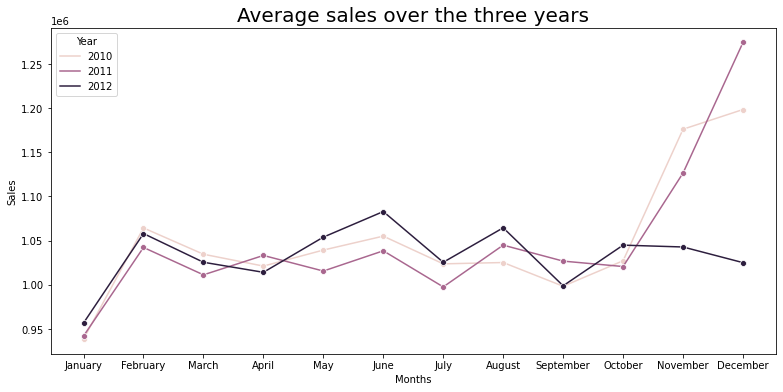

In [36]:
 from calendar import month_name as mn
monthss = mn[1:]
df_sales.Month = pd.Categorical(df_sales.Month, categories=monthss, ordered=True)
plt.figure(figsize=(13,6))
p=sns.lineplot(data=df_sales, x='Month', y='Weekly_Sales', hue='Year', marker='o', ci=None)
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title('Average sales over the three years', fontsize=20)

Penjualan pada awal tahun (Januari) cenderung rendah, sedangkan di akhir tahun penjualan relative naik secara signifikan. Adapun penurunan 

In [37]:
# The Top 10 stores in average sales over all years
top10 = df.groupby(['Store'])['Weekly_Sales'].mean().reset_index().sort_values(by='Weekly_Sales', ascending=False).head(10)
top10

,Store,Weekly_Sales
19,20,2107676.870350
3,4,2094712.960699
13,14,2020978.400979
12,13,2003620.306294
1,2,1925751.335524
9,10,1899424.572657
26,27,1775216.201958
5,6,1564728.186294
0,1,1555264.397552
38,39,1450668.129161


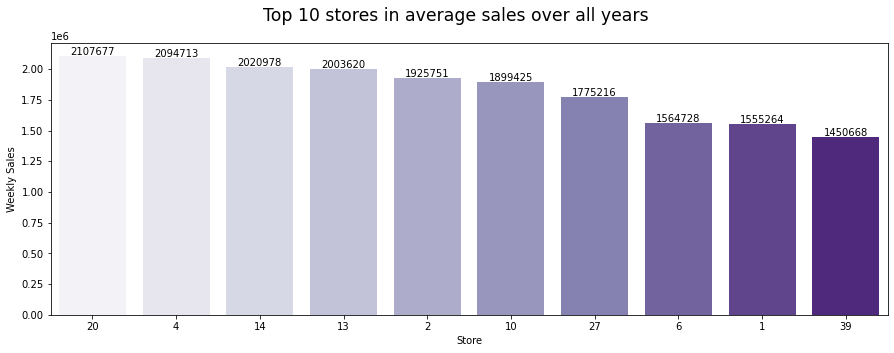

In [38]:
# Barplot The Top 10 stores in average sales over all years
fig = plt.figure(figsize = (15,5))  
fig.suptitle('Top 10 stores in average sales over all years', fontsize = 'xx-large')

ax = sns.barplot(data = top10 , x='Store', y='Weekly_Sales',order=top10.sort_values('Weekly_Sales',ascending = False).Store, palette = 'Purples') 

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 4), textcoords='offset points')
ax.set_ylabel('Weekly Sales')
ax.set_xlabel('Store')

plt.show() 

In [39]:
# The Top 3 stores in total sales in 2010
top3_10 = df[df['Year']==2010].groupby(['Store'])['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).head(3).reset_index()
# The Top 3 stores in total sales in 2011
top3_11 = df[df['Year']==2011].groupby(['Store'])['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).head(3).reset_index()
# The Top 3 stores in total sales in 2012
top3_12 = df[df['Year']==2012].groupby(['Store'])['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).head(3).reset_index()

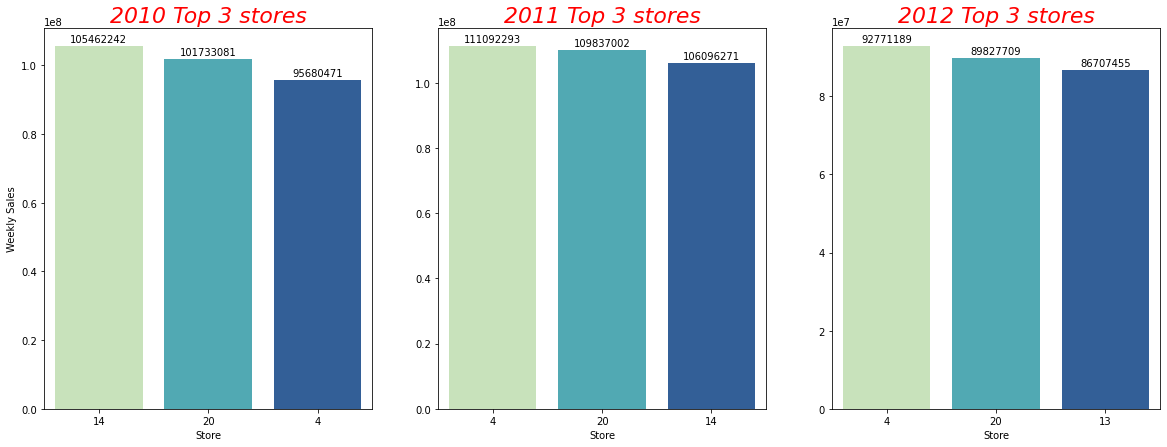

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,7))

sns.barplot(data = top3_10 , x='Store', y='Weekly_Sales',order=top3_10.sort_values('Weekly_Sales',ascending = False).Store, ax=ax1, palette ='YlGnBu') 
ax1.set_title('2010 Top 3 stores',  color='red', fontsize= 22, fontstyle='italic')
ax1.set_ylabel('Weekly Sales')
ax1.set_xlabel('Store')

for p in ax1.patches:
    ax1.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext =(0, 7), textcoords='offset points')

sns.barplot(data = top3_11 , x='Store', y='Weekly_Sales',order=top3_11.sort_values('Weekly_Sales',ascending = False).Store, ax=ax2, palette ='YlGnBu') 
ax2.set_title('2011 Top 3 stores',  color='red', fontsize= 22, fontstyle='italic')
ax2.set_ylabel('')
ax2.set_xlabel('Store')

for p in ax2.patches:
    ax2.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 7), textcoords='offset points')

sns.barplot(data = top3_12 , x='Store', y='Weekly_Sales',order=top3_12.sort_values('Weekly_Sales',ascending = False).Store, ax=ax3, palette ='YlGnBu') 
ax3.set_title('2012 Top 3 stores',  color='red', fontsize= 22, fontstyle='italic')
ax3.set_ylabel('')
ax3.set_xlabel('Store')

for p in ax3.patches:
    ax3.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext =(0, 7), textcoords='offset points')

plt.show()

In [41]:
# Average Sales vs Fuel Price
df.groupby('Fuel_Price')['Weekly_Sales'].mean().to_frame().sort_values(by='Weekly_Sales', ascending=False)

,Weekly_Sales
Fuel_Price,
High,1047613.232676
Low,1046208.936089


Penjualan di Walmart semakin tinggi ketika Harga BBM tinggi, namun perbedaan antara pendapatan saat BBM tinggi dan rendah ini tidak jauh berbeda

In [42]:
# Average Sales vs CPI
df.groupby('CPI')['Weekly_Sales'].mean().to_frame().sort_values(by='Weekly_Sales', ascending=False)

,Weekly_Sales
CPI,
Low,1082953.365245
High,1012541.106735


Penjualan di Walmart semakin tinggi ketika CPI sedang rendah

In [43]:
# Average Sales vs Temperature
df.groupby('Temperature')['Weekly_Sales'].mean().to_frame().sort_values(by='Weekly_Sales', ascending=False)

,Weekly_Sales
Temperature,
Cool,1113007.774005
Warm,1061423.755676
Hot,1017418.437513
Cold,957897.996514


Pendapatan di Walmart tinggi ketika cuacanya sedang tidak ekstrem yaitu saat cool dan warm.

In [44]:
# Average Sales vs Holiday_Flag
df.groupby('Holiday_Flag')['Weekly_Sales'].mean().to_frame().sort_values(by='Weekly_Sales', ascending=False)

,Weekly_Sales
Holiday_Flag,
Holiday week,1122887.892356
Non-holiday week,1041256.380209


Pendapatan di Walmart lebih tinggi ketika sedang Holiday Week

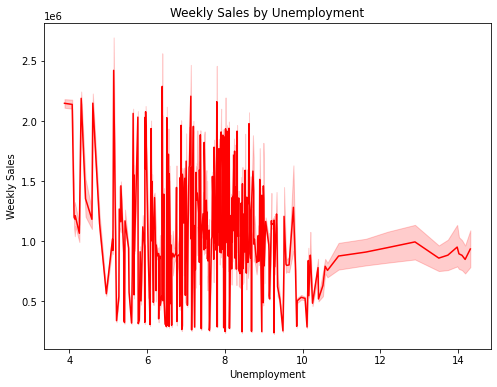

In [45]:
## Average Sales vs Unemployment
fig = plt.figure(figsize=(8, 6))  
ax = sns.lineplot(data = df, x = 'Unemployment', y='Weekly_Sales', color = "red")
title = plt.title('Weekly Sales by Unemployment')
ax.set_ylabel("Weekly Sales")
plt.show() 

Pendapatan di Walmart cenderung rendah dan konstan ketika angka pengangguran sudah >10. 

# Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [46]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10')|(df['Date'] == '2013-02-08'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10')&(df['Date'] != '2013-02-08'),'Super_Bowl'] = False

# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07')|(df['Date'] == '2013-09-06'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07')&(df['Date'] != '2013-09-06'),'Labor_Day'] = False

# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25')|(df['Date'] == '2012-11-23')|(df['Date'] == '2013-11-29'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25')&(df['Date'] != '2012-11-23')&(df['Date'] != '2013-11-29'),'Thanksgiving'] = False

#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30')|(df['Date'] == '2012-12-28')|(df['Date'] == '2013-12-27'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30')&(df['Date'] != '2012-12-28')&(df['Date'] != '2013-12-27'),'Christmas'] = False

In [47]:
df[(df['Holiday_Flag'] == 'Holiday week')|(df['Super_Bowl'] == 'False')]#|(df['Date'] == '2012-11-23')|(df['Date'] == '2013-11-29')]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayofYear,Day,DateofMonth,Month,Year,Super_Bowl,Labor_Day,Thanksgiving,Christmas
1,1,2010-12-02,1641957.440000,Holiday week,Cool,Low,High,8.106000,336,Wednesday,2,December,2010,False,False,False,False
31,1,2010-10-09,1507460.690000,Holiday week,Hot,Low,High,7.787000,282,Friday,9,October,2010,False,False,False,False
42,1,2010-11-26,1955624.110000,Holiday week,Warm,Low,High,7.838000,330,Thursday,26,November,2010,False,False,True,False
47,1,2010-12-31,1367320.010000,Holiday week,Warm,Low,High,7.838000,365,Thursday,31,December,2010,False,False,False,True
53,1,2011-11-02,1649614.930000,Holiday week,Cool,Low,High,7.742000,306,Tuesday,2,November,2011,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.560000,Holiday week,Hot,High,High,8.625000,252,Thursday,9,September,2011,False,True,False,False
6386,45,2011-11-25,1170672.940000,Holiday week,Warm,High,High,8.523000,329,Thursday,25,November,2011,False,False,True,False
6391,45,2011-12-30,869403.630000,Holiday week,Cool,High,High,8.523000,364,Thursday,30,December,2011,False,False,False,True
6397,45,2012-10-02,803657.120000,Holiday week,Cool,High,High,8.424000,276,Monday,2,October,2012,False,False,False,False


In [48]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayofYear,Day,DateofMonth,Month,Year,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,2010-05-02,1643690.900000,Non-holiday week,Cool,Low,High,8.106000,122,Saturday,2,May,2010,False,False,False,False
1,1,2010-12-02,1641957.440000,Holiday week,Cool,Low,High,8.106000,336,Wednesday,2,December,2010,False,False,False,False
2,1,2010-02-19,1611968.170000,Non-holiday week,Cool,Low,High,8.106000,50,Thursday,19,February,2010,False,False,False,False
3,1,2010-02-26,1409727.590000,Non-holiday week,Warm,Low,High,8.106000,57,Thursday,26,February,2010,False,False,False,False
4,1,2010-05-03,1554806.680000,Non-holiday week,Warm,Low,High,8.106000,123,Sunday,3,May,2010,False,False,False,False


# 2010

In [49]:
df2010 = df[df.Year==2010]

In [51]:
print(df2010.groupby(['Christmas'])['Weekly_Sales'].mean())
print(df2010.groupby(['Labor_Day'])['Weekly_Sales'].mean())
print(df2010.groupby(['Super_Bowl'])['Weekly_Sales'].mean())
print(df2010.groupby(['Thanksgiving'])['Weekly_Sales'].mean())
print(df2010.groupby('Holiday_Flag')['Weekly_Sales'].mean())

Christmas
False   1063098.629508
True     898500.422222
Name: Weekly_Sales, dtype: float64
Labor_Day
False   1059669.500190
Name: Weekly_Sales, dtype: float64
Super_Bowl
False   1059669.500190
Name: Weekly_Sales, dtype: float64
Thanksgiving
False   1051094.618047
True    1462688.960889
Name: Weekly_Sales, dtype: float64
Holiday_Flag
Holiday week       1112358.876167
Non-holiday week   1054879.556919
Name: Weekly_Sales, dtype: float64


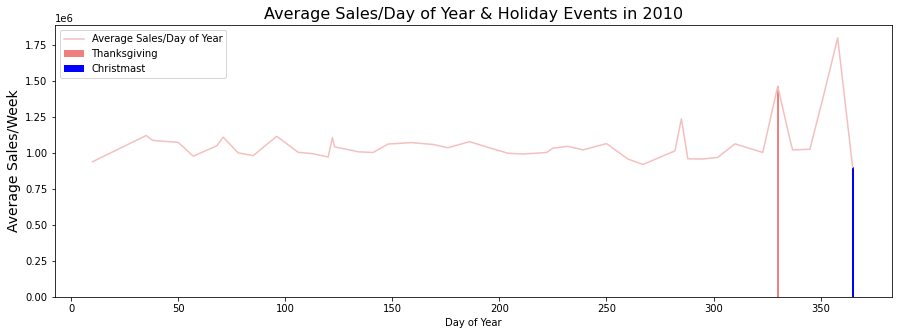

In [52]:
fig = plt.figure(figsize=(15,5))  
df2010.groupby(['DayofYear'])['Weekly_Sales'].mean().plot(kind = 'line', color='#F4BFBF', label = "Average Sales/Day of Year")

plt.bar(330,1462688.960889, color='lightcoral', label = "Thanksgiving") #Thanksgiving
plt.bar(41,0, color='lightcoral') #SuperBowl
plt.bar(253,0, color='orange') #LaborDay
plt.bar(365,898500.422222, color='blue', label = "Christmast") #Christmast

plt.title('Average Sales/Day of Year & Holiday Events in 2010', size=16)
plt.ylabel('Average Sales/Week', size=14)
plt.xlabel('Day of Year', size=10)
plt.legend()
plt.show()

# 2011

In [53]:
df2011 = df[df.Year==2011]
print(df2011.groupby(['Christmas'])['Weekly_Sales'].mean())
print(df2011.groupby(['Labor_Day'])['Weekly_Sales'].mean())
print(df2011.groupby(['Super_Bowl'])['Weekly_Sales'].mean())
print(df2011.groupby(['Thanksgiving'])['Weekly_Sales'].mean())
print(df2011.groupby('Holiday_Flag')['Weekly_Sales'].mean())

Christmas
False   1046691.741312
True    1023165.800889
Name: Weekly_Sales, dtype: float64
Labor_Day
False   1046377.681839
True    1039182.834000
Name: Weekly_Sales, dtype: float64
Super_Bowl
False   1046239.319380
Name: Weekly_Sales, dtype: float64
Thanksgiving
False   1037736.994375
True    1479857.894667
Name: Weekly_Sales, dtype: float64
Holiday_Flag
Holiday week       1148530.481222
Non-holiday week   1037715.055894
Name: Weekly_Sales, dtype: float64


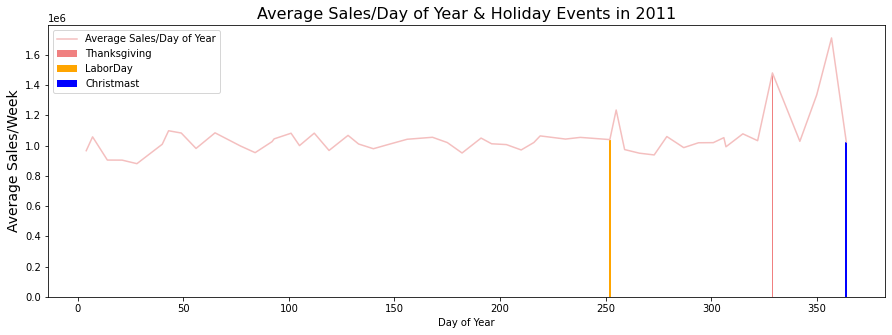

In [54]:
fig = plt.figure(figsize=(15,5))  
df2011.groupby(['DayofYear'])['Weekly_Sales'].mean().plot(kind = 'line', color='#F4BFBF', label = "Average Sales/Day of Year")

plt.bar(329,1479857.894667, color='lightcoral', label = 'Thanksgiving') #Thanksgiving
plt.bar(41,0, color='lightcoral') #SuperBowl
plt.bar(252,1039182.834000, color='orange', label = "LaborDay") #LaborDay
plt.bar(364,1023165.800889, color='blue', label = "Christmast") #Christmast

plt.title('Average Sales/Day of Year & Holiday Events in 2011', size=16)
plt.ylabel('Average Sales/Week', size=14)
plt.xlabel('Day of Year', size=10)
plt.legend()
plt.show()

# 2012

In [55]:
df2012 = df[df.Year==2012]
print(df2012.groupby(['Christmas'])['Weekly_Sales'].mean())
print(df2012.groupby(['Labor_Day'])['Weekly_Sales'].mean())
print(df2012.groupby(['Super_Bowl'])['Weekly_Sales'].mean())
print(df2012.groupby(['Thanksgiving'])['Weekly_Sales'].mean())
print(df2012.groupby('Holiday_Flag')['Weekly_Sales'].mean())

Christmas
False   1033660.392429
Name: Weekly_Sales, dtype: float64
Labor_Day
False   1033660.392429
Name: Weekly_Sales, dtype: float64
Super_Bowl
False   1033660.392429
Name: Weekly_Sales, dtype: float64
Thanksgiving
False   1033660.392429
Name: Weekly_Sales, dtype: float64
Holiday_Flag
Holiday week       1092660.747000
Non-holiday week   1030782.326352
Name: Weekly_Sales, dtype: float64


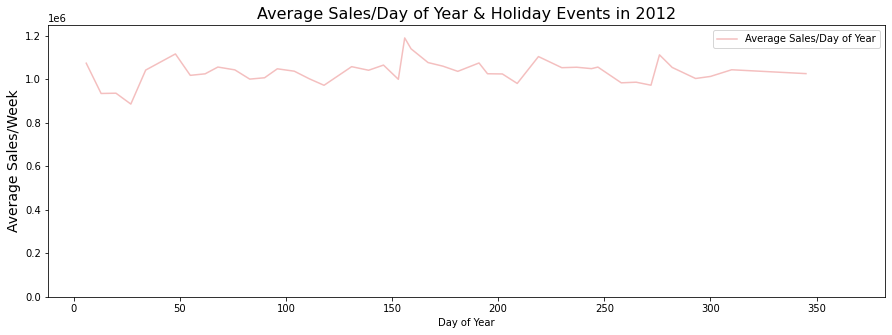

In [56]:
fig = plt.figure(figsize=(15,5))  
df2012.groupby(['DayofYear'])['Weekly_Sales'].mean().plot(kind = 'line', color='#F4BFBF', label = "Average Sales/Day of Year")

plt.bar(329,0, color='lightcoral') #Thanksgiving
plt.bar(41,0, color='lightcoral') #SuperBowl
plt.bar(252,0, color='orange') #LaborDay
plt.bar(364,0, color='blue') #Christmast

plt.title('Average Sales/Day of Year & Holiday Events in 2012', size=16)
plt.ylabel('Average Sales/Week', size=14)
plt.xlabel('Day of Year', size=10)
plt.legend()
plt.show()



*   Penjualan pada saat minggu Labor Day tidak meningkat, tetapi meningkat di minggu setelahnya ketika buruh sudah mendapatkan tunjangan dan biasanya terdapat Labor Day Sales yaitu diskon besar-besaran.
*   Penjualan meningkat di minggu Thanksgiving, hal ini karena harus memasak hidangan yang besar.
* Penjualan pada bulan Desember meningkat satu minggu sebelum Event Natal, hal ini bisa disebabkan karena pada pembeli membeli kebutuhan-kebutuhan seperti dekorasi, hadiah, dll.



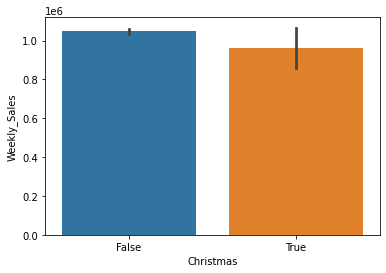

In [57]:
# Christmas holiday vs not-Christmas
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) 

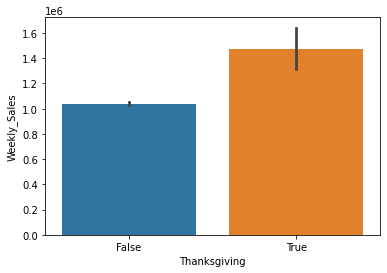

In [58]:
# Thanksgiving holiday vs not-thanksgiving
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) 

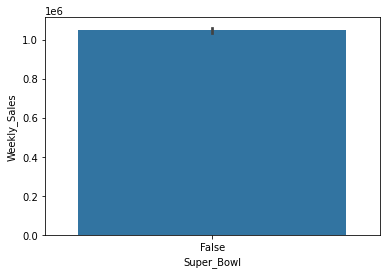

In [59]:
# Super bowl holiday vs not-super bowl
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) 

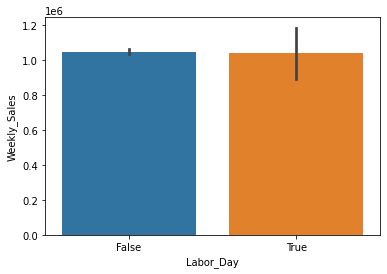

In [60]:
# Labor day holiday vs not-labor day
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) 

It is shown that for the graphs, Labor Day and Christmas do not increase weekly average sales. There is positive effect on sales in Super bowl, but the highest difference is in the Thanksgiving. I think, people generally prefer to buy Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week. And, there is Black Friday sales in the Thanksgiving week.

In [61]:
print(df.groupby(['Christmas'])['Weekly_Sales'].mean())
print(df.groupby(['Labor_Day'])['Weekly_Sales'].mean())
print(df.groupby(['Super_Bowl'])['Weekly_Sales'].mean())
print(df.groupby(['Thanksgiving'])['Weekly_Sales'].mean())
print(df.groupby('Holiday_Flag')['Weekly_Sales'].mean())

Christmas
False   1048186.604739
True     960833.111556
Name: Weekly_Sales, dtype: float64
Labor_Day
False   1047019.680685
True    1039182.834000
Name: Weekly_Sales, dtype: float64
Super_Bowl
False   1046964.877562
Name: Weekly_Sales, dtype: float64
Thanksgiving
False   1040946.316566
True    1471273.427778
Name: Weekly_Sales, dtype: float64
Holiday_Flag
Holiday week       1122887.892356
Non-holiday week   1041256.380209
Name: Weekly_Sales, dtype: float64


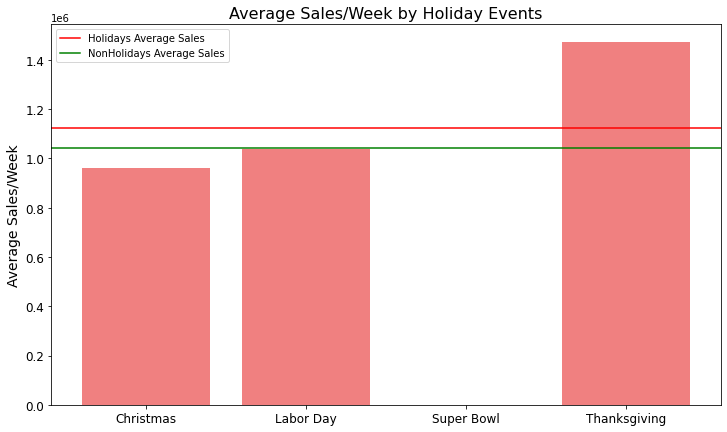

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

event = ['Christmas','Labor Day','Super Bowl','Thanksgiving']
avg = [960833.1,1039182.8,0,1471273.4]

plt.figure(figsize=(12,7))
plt.bar(event,avg, color='lightcoral')

plt.title('Average Sales/Week by Holiday Events', size=16)
plt.ylabel('Average Sales/Week', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.axhline(y=1122887.9,color='r',label = "Holidays Average Sales") # holidays avg
plt.axhline(y=1041256.4,color='green',label = "NonHolidays Average Sales") # not-holiday avg
plt.legend()
plt.show()

Pada saat event Christmas dan Labor Day, rata-rata pendapatannya lebih kecil dengan Non-Holiday Week karena biasanya pengunjung membeli di minggu sebelum/sesudah event. Kemudian pada saat Thanksgiving penjualannya di atas rata-rata.

# Model 1

In [ ]:
from sklearn import datasets, linear_model, metrics

### Additional Data Preparation before modeling

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayofYear,Day,Month,Year,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,2010-05-02,1643690.900000,Non-holiday week,Cool,Low,High,8.106000,122,Saturday,May,2010,False,False,False,False
1,1,2010-12-02,1641957.440000,Holiday week,Cool,Low,High,8.106000,336,Wednesday,December,2010,False,False,False,False
2,1,2010-02-19,1611968.170000,Non-holiday week,Cool,Low,High,8.106000,50,Thursday,February,2010,False,False,False,False
3,1,2010-02-26,1409727.590000,Non-holiday week,Warm,Low,High,8.106000,57,Thursday,February,2010,False,False,False,False
4,1,2010-05-03,1554806.680000,Non-holiday week,Warm,Low,High,8.106000,123,Sunday,May,2010,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.950000,Non-holiday week,Warm,High,High,8.684000,272,Thursday,September,2012,False,False,False,False
6431,45,2012-05-10,733455.070000,Non-holiday week,Warm,High,High,8.667000,131,Wednesday,May,2012,False,False,False,False
6432,45,2012-12-10,734464.360000,Non-holiday week,Warm,High,High,8.667000,345,Sunday,December,2012,False,False,False,False
6433,45,2012-10-19,718125.530000,Non-holiday week,Warm,High,High,8.667000,293,Thursday,October,2012,False,False,False,False


In [ ]:
data=pd.read_csv('Walmart.csv')
# Extract the day, month, year from the Date column:
data['Date'] = pd.to_datetime(data['Date'])
data['DayofYear'] = data['Date'].dt.day
data['Day'] = data['Date'].dt.weekday
data['Month'] = data['Date'].dt.month
data['Year']  = data['Date'].dt.year
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayofYear,Day,Month,Year
0,1,2010-05-02,1643690.900000,0,42.310000,2.572000,211.096358,8.106000,2,6,5,2010
1,1,2010-12-02,1641957.440000,1,38.510000,2.548000,211.242170,8.106000,2,3,12,2010
2,1,2010-02-19,1611968.170000,0,39.930000,2.514000,211.289143,8.106000,19,4,2,2010
3,1,2010-02-26,1409727.590000,0,46.630000,2.561000,211.319643,8.106000,26,4,2,2010
4,1,2010-05-03,1554806.680000,0,46.500000,2.625000,211.350143,8.106000,3,0,5,2010


In [ ]:
data['Unemployment']=data['Unemployment']/data['Unemployment'].max()

In [ ]:
# Menghapus kolom Date dan DayofYear
data=data.drop(['Date'], axis=1)
df1=pd.DataFrame(data)
df1.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayofYear,Day,Month,Year
0,1,1643690.900000,0,42.310000,2.572000,211.096358,0.566338,2,6,5,2010
1,1,1641957.440000,1,38.510000,2.548000,211.242170,0.566338,2,3,12,2010
2,1,1611968.170000,0,39.930000,2.514000,211.289143,0.566338,19,4,2,2010
3,1,1409727.590000,0,46.630000,2.561000,211.319643,0.566338,26,4,2,2010
4,1,1554806.680000,0,46.500000,2.625000,211.350143,0.566338,3,0,5,2010


In [ ]:
 df1.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'DayofYear', 'Day', 'Month', 'Year'],
      dtype='object')

In [ ]:
# Melakukan definisi terhadup feature matrix(X) dan response vector(y)
X = df1.loc[:, df1.columns != 'Weekly_Sales']
y = df1["Weekly_Sales"]
X

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayofYear,Day,Month,Year
0,1,0,42.310000,2.572000,211.096358,0.566338,2,6,5,2010
1,1,1,38.510000,2.548000,211.242170,0.566338,2,3,12,2010
2,1,0,39.930000,2.514000,211.289143,0.566338,19,4,2,2010
3,1,0,46.630000,2.561000,211.319643,0.566338,26,4,2,2010
4,1,0,46.500000,2.625000,211.350143,0.566338,3,0,5,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,0,64.880000,3.997000,192.013558,0.606721,28,4,9,2012
6431,45,0,64.890000,3.985000,192.170412,0.605533,10,3,5,2012
6432,45,0,54.470000,4.000000,192.327265,0.605533,10,0,12,2012
6433,45,0,56.470000,3.969000,192.330854,0.605533,19,4,10,2012


In [ ]:
# Membagi X dan Y kedalam data train dan data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=42)

In [ ]:
#One Hot Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(sparse=False,drop='first'),['Store','Holiday_Flag','Year'])],remainder='passthrough')

In [ ]:
X_train= transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
# Mendefinisikan objek linear regresion
reg = LinearRegression()
 
# melakukan train model menggunakan data train
reg.fit(X_train, y_train)
 
# menampilkan koefisien regresi (m)
print('Coefficients: ', reg.coef_)

# menampilkan intercept (b)
print('Intercept: ', reg.intercept_)

Coefficients:  [ 3.92041350e+05 -1.22332046e+06  1.91351867e+06 -1.31499390e+06
 -6.53651872e+04 -6.15861999e+05 -7.94433596e+05 -1.15407105e+06
  1.82767022e+06 -2.82645300e+05  1.13247556e+06  1.85439586e+06
  9.40093628e+05  3.86427262e+05 -7.65909913e+05  7.07545623e+05
  8.91744646e+05  1.21573757e+06  6.34654955e+05 -8.04194598e+05
  7.20961577e+05  1.01797473e+06  1.14100977e+06 -7.79776985e+05
  7.50466829e+05  1.50817225e+06  1.43541509e+06  3.84799725e+05
 -1.11574234e+06 -1.58153291e+05 -1.00330499e+04  1.82164650e+05
  9.38093554e+05  6.62038752e+05 -1.15540326e+06 -1.00582168e+06
  4.95522816e+05 -7.94657491e+04  5.82289962e+05 -1.09575115e+04
  4.68830908e+05 -6.92031690e+05  1.26417388e+05 -2.64075564e+05
  2.52865162e+04 -1.16970082e+05 -2.25463150e+05 -1.54206882e+03
  4.14906982e+04  1.66327880e+04 -6.29200320e+05 -9.85791511e+02
 -1.82952709e+03  8.13274208e+03]
Intercept:  -1644180.0384528267


Variance score: 0.9228404370160762


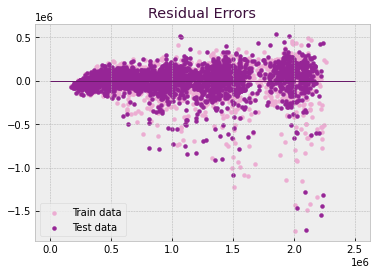

In [ ]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('bmh')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "#ecacd2", s = 15, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "#962596", s = 15, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 2500000.00, linewidth = 1, color='#691a69')
 
## plotting legend
plt.legend(loc = 'lower left')
 
## plot title
plt.title("Residual Errors", color='#3c0f3c', fontname='Comic Sans')
 
## method call for showing the plot
plt.show()

In [ ]:
## Evaluation Matrix

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
mse=[]
mae=[]
rmse=[]
r2=[]

In [ ]:
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print(f'RMSE : {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R2 : {r2_score(y_test,y_pred)}')

mse.append(mean_squared_error(y_test,y_pred))
mae.append(mean_absolute_error(y_test,y_pred))
rmse.append(mean_squared_error(y_test, y_pred, squared=False))
r2.append(r2_score(y_test,y_pred))

MSE: 24514087285.73124
MAE: 97375.4748247872
RMSE : 156569.75214175705
R2 : 0.9228404370160762


## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', rdg.coef_)

# regression intercept
print('Intercept: ', rdg.intercept_)

Coefficients:  [ 4.92392706e+05 -1.05485663e+06  1.02371096e+06 -1.16809126e+06
  7.38563634e+04 -7.64620735e+05 -6.17526860e+05 -9.67769219e+05
  9.09139851e+05 -1.27657872e+05  1.61368001e+05  9.56172166e+05
  6.87544279e+05 -4.33808237e+05 -8.86390982e+05 -1.71679883e+05
  5.27155099e+04  3.84700390e+05  6.60899627e+05 -6.91021626e+05
 -6.24960385e+04  2.30758180e+05  3.05263516e+05 -7.37817827e+05
 -7.14566027e+04  7.16933228e+05  4.61035204e+05 -4.62432941e+05
 -1.00065560e+06 -5.25998575e+04 -1.66386551e+05 -7.19638674e+05
  1.16519079e+04 -1.29649939e+05 -1.05284130e+06 -9.05514569e+05
 -4.67793665e+05  1.10023866e+04 -1.99854184e+05 -1.47258616e+05
 -4.33968953e+05 -6.99734767e+05 -7.50425951e+05 -5.04384430e+05
  2.36534016e+04 -7.19000677e+04 -1.24812205e+05 -1.36176055e+03
  4.18477189e+04  5.10389487e+03 -4.46296473e+05 -7.41628854e+02
 -2.42682967e+03  1.01372685e+04]
Intercept:  565538.3171890494


In [ ]:
## Evaluation

In [ ]:
y_pred = rdg.predict(X_test)

In [ ]:
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print(f'RMSE : {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R2 : {r2_score(y_test,y_pred)}')

mse.append(mean_squared_error(y_test,y_pred))
mae.append(mean_absolute_error(y_test,y_pred))
rmse.append(mean_squared_error(y_test, y_pred, squared=False))
r2.append(r2_score(y_test,y_pred))

MSE: 24924341736.26162
MAE: 97826.00088681589
RMSE : 157874.44928252837
R2 : 0.921549136477485


### Decision Tree Regressor

In [ ]:
from sklearn import tree

dtr = tree.DecisionTreeRegressor(random_state=123)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

In [ ]:
## Evaluation

In [ ]:
y_pred = dtr.predict(X_test)

In [ ]:
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print(f'RMSE : {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R2 : {r2_score(y_test,y_pred)}')

mse.append(mean_squared_error(y_test,y_pred))
mae.append(mean_absolute_error(y_test,y_pred))
rmse.append(mean_squared_error(y_test, y_pred, squared=False))
r2.append(r2_score(y_test,y_pred))

MSE: 28778944197.293335
MAE: 88363.44871017872
RMSE : 169643.57988822722
R2 : 0.9094165435767867


### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print(f'RMSE : {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R2 : {r2_score(y_test,y_pred)}')

mse.append(mean_squared_error(y_test,y_pred))
mae.append(mean_absolute_error(y_test,y_pred))
rmse.append(mean_squared_error(y_test, y_pred, squared=False))
r2.append(r2_score(y_test,y_pred))

MSE: 20064018204.160213
MAE: 71611.00529226885
RMSE : 141647.51393568548
R2 : 0.9368472968913836


### Resume

In [ ]:
resume_df=pd.DataFrame({'MSE': mse,'MAE': mae,'RMSE':rmse,'R2': r2},
                       index=['Linear Regression', 'Ridge Regression','Decision Tree Regressor','Random Forest Regressor'])
resume_df

,MSE,MAE,RMSE,R2
Linear Regression,24514087285.731239,97375.474825,156569.752142,0.922840
Ridge Regression,24924341736.261620,97826.000887,157874.449283,0.921549
Decision Tree Regressor,28778944197.293335,88363.448710,169643.579888,0.909417
Random Forest Regressor,20064018204.160213,71611.005292,141647.513936,0.936847


Pada Model Machine Learning 1, regresi terbaik terhadap dataset Walmart didapatkan dengan menggunakan model Random Forest Regressor. Model ini mendapatkan evaluasi matriks R2 lebih tinggi dibanding model lain, dengan nilai R2 sebesar 93.68%.

# Model 2 (Drop 'CPI' Column)

Berdasarkan kolerasi antar kolom, CPI memiliki kolerasi paling rendah dengan target kolom yang kita prediksi, yaitu Weekly_Sales. Sehingga pada model yang kedua ini, kita akan mencoba untuk untuk menghapus kolom CPI.

In [ ]:
# Mendefinisikan dataframe baru
df2=data.drop(['Fuel_Price'], axis=1)
df2

,Store,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment,DayofYear,Day,Month,Year
0,1,1643690.900000,0,42.310000,211.096358,0.566338,2,6,5,2010
1,1,1641957.440000,1,38.510000,211.242170,0.566338,2,3,12,2010
2,1,1611968.170000,0,39.930000,211.289143,0.566338,19,4,2,2010
3,1,1409727.590000,0,46.630000,211.319643,0.566338,26,4,2,2010
4,1,1554806.680000,0,46.500000,211.350143,0.566338,3,0,5,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.950000,0,64.880000,192.013558,0.606721,28,4,9,2012
6431,45,733455.070000,0,64.890000,192.170412,0.605533,10,3,5,2012
6432,45,734464.360000,0,54.470000,192.327265,0.605533,10,0,12,2012
6433,45,718125.530000,0,56.470000,192.330854,0.605533,19,4,10,2012


In [ ]:

# defining feature matrix(X) and response vector(y)
X = df2.loc[:, df2.columns != 'Weekly_Sales']
y = df2["Weekly_Sales"]

In [ ]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=42)

In [ ]:
# One Hot Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(sparse=False,drop='first'),['Store','Holiday_Flag','Year'])],remainder='passthrough')

In [ ]:
X_train= transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

### Linear Regression

In [ ]:
# Mendefinisikan objek linear regresion
reg = LinearRegression()
 
# melakukan train model menggunakan data train
reg.fit(X_train, y_train)
 
# menampilkan koefisien regresi (m)
print('Coefficients: ', reg.coef_)

# menampilkan intercept (b)
print('Intercept: ', reg.intercept_)

Coefficients:  [ 3.92497296e+05 -1.22427350e+06  1.93538371e+06 -1.31412116e+06
 -6.44668264e+04 -6.04493142e+05 -7.92917054e+05 -1.15422861e+06
  1.86297914e+06 -2.84195753e+05  1.17026000e+06  1.88189232e+06
  9.57957556e+05  4.24536477e+05 -7.54545278e+05  7.36365103e+05
  9.23793005e+05  1.25351857e+06  6.47208480e+05 -8.03239056e+05
  7.52064189e+05  1.05164230e+06  1.17826165e+06 -7.66053897e+05
  7.83409851e+05  1.54338809e+06  1.47148405e+06  4.16711251e+05
 -1.11549665e+06 -1.58122549e+05 -5.57016315e+01  2.17419319e+05
  9.60694017e+05  6.91933922e+05 -1.15589251e+06 -1.00507125e+06
  5.32470008e+05 -7.97865241e+04  6.16172667e+05 -6.58850924e+02
  5.05382323e+05 -6.90256271e+05  1.53584606e+05 -2.46501392e+05
  2.28083762e+04 -8.64264226e+04 -1.90815262e+05 -1.36505338e+03
  1.68788472e+04 -6.26925060e+05 -9.18538945e+02 -2.05211659e+03
  8.40079965e+03]
Intercept:  -1600762.1375442303


Variance score: 0.9227805330660064


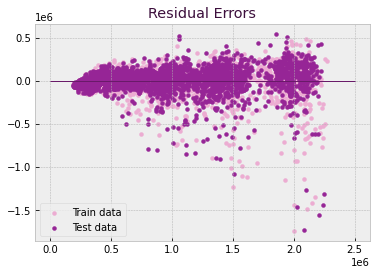

In [ ]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('bmh')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "#ecacd2", s = 15, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "#962596", s = 15, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 2500000.00, linewidth = 1, color='#691a69')
 
## plotting legend
plt.legend(loc = 'lower left')
 
## plot title
plt.title("Residual Errors", color='#3c0f3c', fontname='Comic Sans')
 
## method call for showing the plot
plt.show()

In [ ]:
## Evaluation Matrix

In [ ]:
y_pred = reg.predict(X_test)
mse=[]
mae=[]
rmse=[]
r2=[]

In [ ]:
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print(f'RMSE : {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R2 : {r2_score(y_test,y_pred)}')

mse.append(mean_squared_error(y_test,y_pred))
mae.append(mean_absolute_error(y_test,y_pred))
rmse.append(mean_squared_error(y_test, y_pred, squared=False))
r2.append(r2_score(y_test,y_pred))

MSE: 24533119154.290142
MAE: 97433.44210930064
RMSE : 156630.51795320777
R2 : 0.9227805330660064


## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', rdg.coef_)

# regression intercept
print('Intercept: ', rdg.intercept_)

Coefficients:  [ 4.92006071e+05 -1.05526988e+06  1.01291335e+06 -1.16770320e+06
  7.46079230e+04 -7.62146256e+05 -6.15440535e+05 -9.67189763e+05
  9.11696737e+05 -1.28719862e+05  1.66179629e+05  9.50987355e+05
  6.93792344e+05 -4.26055624e+05 -8.83885917e+05 -1.75503406e+05
  5.43442039e+04  3.92107138e+05  6.70135914e+05 -6.90969569e+05
 -6.03738124e+04  2.34177955e+05  3.12118421e+05 -7.27426086e+05
 -6.88349860e+04  7.23170731e+05  4.64183373e+05 -4.61003671e+05
 -1.00131986e+06 -5.34582701e+04 -1.65325601e+05 -7.17196827e+05
  1.46710960e+03 -1.28756700e+05 -1.05458267e+06 -9.06031424e+05
 -4.63775250e+05  9.43082685e+03 -1.96226542e+05 -1.45864710e+05
 -4.30174740e+05 -7.01771257e+05 -7.55951839e+05 -4.98499977e+05
  2.11170573e+04 -3.98600609e+04 -8.71505056e+04 -1.17982133e+03
  4.98281758e+03 -4.43557530e+05 -6.66523071e+02 -2.67061345e+03
  1.04606274e+04]
Intercept:  687754.5217675454


In [ ]:
## Evaluation

In [ ]:
y_pred = rdg.predict(X_test)

In [ ]:
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print(f'RMSE : {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R2 : {r2_score(y_test,y_pred)}')

mse.append(mean_squared_error(y_test,y_pred))
mae.append(mean_absolute_error(y_test,y_pred))
rmse.append(mean_squared_error(y_test, y_pred, squared=False))
r2.append(r2_score(y_test,y_pred))

MSE: 24969999125.13864
MAE: 97883.18664473883
RMSE : 158018.98343280988
R2 : 0.9214054271020686


### Decision Tree Regressor

In [ ]:
from sklearn import tree

dtr = tree.DecisionTreeRegressor(random_state=123)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

In [ ]:
## Evaluation

In [ ]:
y_pred = dtr.predict(X_test)

In [ ]:
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print(f'RMSE : {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R2 : {r2_score(y_test,y_pred)}')

mse.append(mean_squared_error(y_test,y_pred))
mae.append(mean_absolute_error(y_test,y_pred))
rmse.append(mean_squared_error(y_test, y_pred, squared=False))
r2.append(r2_score(y_test,y_pred))

MSE: 29978938907.623966
MAE: 88938.00928127428
RMSE : 173144.2719457504
R2 : 0.9056394881085202


### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print(f'RMSE : {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'R2 : {r2_score(y_test,y_pred)}')

mse.append(mean_squared_error(y_test,y_pred))
mae.append(mean_absolute_error(y_test,y_pred))
rmse.append(mean_squared_error(y_test, y_pred, squared=False))
r2.append(r2_score(y_test,y_pred))

MSE: 20543483549.635277
MAE: 72621.73060567211
RMSE : 143329.98133550174
R2 : 0.9353381509015051


In [ ]:
resume_df=pd.DataFrame({'MSE': mse,'MAE': mae,'RMSE':rmse,'R2': r2},
                       index=['Linear Regression', 'Ridge Regression','Decision Tree Regressor','Random Forest Regressor'])
resume_df

,MSE,MAE,RMSE,R2
Linear Regression,24533119154.290142,97433.442109,156630.517953,0.922781
Ridge Regression,24969999125.138641,97883.186645,158018.983433,0.921405
Decision Tree Regressor,29978938907.623966,88938.009281,173144.271946,0.905639
Random Forest Regressor,20543483549.635277,72621.730606,143329.981336,0.935338


Pada Model ke-2, hasil regresi terbaik didapatkan melalui model Random Forest Regression.

Bila dibandingkan dengan Model yang pertama, Model yang pertama memiliki nilai evaluasi lebih tinggi. Sehingga kita akan menggunakan model yang pertama (tanpa menghapus feature Fuel_Price) untuk dilakukan Hyper Parameter Tuning.


# Hyper Parameter Tuning

## Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

base_model = RandomForestRegressor()

In [ ]:
# Melakukan definisi terhadup feature matrix(X) dan response vector(y)
X = df1.loc[:, df1.columns != 'Weekly_Sales']
y = df1["Weekly_Sales"]
X

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayofYear,Day,Month,Year
0,1,0,42.310000,2.572000,211.096358,0.566338,2,6,5,2010
1,1,1,38.510000,2.548000,211.242170,0.566338,2,3,12,2010
2,1,0,39.930000,2.514000,211.289143,0.566338,19,4,2,2010
3,1,0,46.630000,2.561000,211.319643,0.566338,26,4,2,2010
4,1,0,46.500000,2.625000,211.350143,0.566338,3,0,5,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,0,64.880000,3.997000,192.013558,0.606721,28,4,9,2012
6431,45,0,64.890000,3.985000,192.170412,0.605533,10,3,5,2012
6432,45,0,54.470000,4.000000,192.327265,0.605533,10,0,12,2012
6433,45,0,56.470000,3.969000,192.330854,0.605533,19,4,10,2012


In [ ]:
# Membagi X dan Y kedalam data train dan data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=42)

In [ ]:
#One Hot Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(sparse=False,drop='first'),['Store','Holiday_Flag','Year'])],remainder='passthrough')

In [ ]:
X_train= transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [ ]:
base_model.fit(X_train, y_train)
base_pred = base_model.predict(X_test)
base_rmse = mean_squared_error(y_test, base_pred, squared=False)
print('Base Model has RMSE:', base_rmse)
print('Base Model has R2-Score:', r2_score(y_test, base_pred))

Base Model has RMSE: 143679.65109977665
Base Model has R2-Score: 0.93502226620648


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, cv = 5, verbose=3, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True, verbose=3)

In [ ]:
rf_random.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [ ]:
new_pred = rf_random.best_estimator_.predict(X_test)
new_rmse = np.sqrt(mse(y_test, new_pred))
print('New Model has RMSE:', new_rmse)
print('New Model has R2-Score:', r2_score(y_test, new_pred))

New Model has RMSE: 133904.74730558024
New Model has R2-Score: 0.9435627323584822


In [ ]:
print('Improvement of:', ((base_rmse - new_rmse)/base_rmse)*100, '%')

Improvement of: 6.803262479673157 %


Setelah dilakukan Random Forest Hyperparameter Tuning, terjadi peningkatan akurasi terhadap model sebesar 6.8%.

# Conclusion

**Insight :**
- Rata-rata penjualan di Walmart selama tiga tahun terus menurun, sehingga pihak Walmart diharapkan dapat meningkatkan penjualan dengan beberapa cara seperti memberikan promo di waktu-waktu peak season.
- Tanggal muda/tua tidak berpengaruh terhadap penjualan di Walmart.
- Penjualan terbanyak pada overall years terjadi pada bulan Desember yang terjadi karena merupakan akhir tahun dan perayaan natal, bulan November dimana ada thanksgiving dan black friday, bulan Juni yang biasanya merupakan bulan dimulainya libur musim panas.
- Penjualan pada bulan Januari selalu mengalami penurunan dan akan naik kembali pada bulan Februari.
- Harga BBM tidak mempengaruhi penjualan Walmart, sedangkan cuaca sangat mempengaruhi penjualan.
- Penjualan pada saat minggu Labor Day tidak meningkat, tetapi meningkat di minggu setelahnya ketika buruh sudah mendapatkan tunjangan dan biasanya terdapat Labor Day Sales yaitu diskon besar-besaran.
- Penjualan meningkat di minggu Thanksgiving, hal ini karena harus memasak hidangan yang besar.
- Penjualan pada bulan Desember meningkat satu minggu sebelum Event Natal, hal ini bisa disebabkan karena pada pembeli membeli kebutuhan-kebutuhan seperti dekorasi, hadiah, dll.

